# PREDICTING THE LIKELIHOOD OF CANDIDATE JOINING THE COMPANY OR NOT

In [2]:
#Import the required libaries.
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#Misc to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/Users/maha/Library/CloudStorage/OneDrive-Personal/HR_DATA.csv")

In [4]:
df

,SLNO,Candidate_ref,DOJ_extended,Accept_duration,Notice_period,Offered_band,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


# Exploratory Data Analysis (EDA): 

In [3]:
df.head()

,SLNO,Candidate_ref,DOJ_extended,Accept_duration,Notice_period,Offered_band,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
df.shape

(8995, 18)

In [5]:
df.isnull().sum()

SLNO                    0
Candidate_ref           0
DOJ_extended            0
Accept_duration         0
Notice_period           0
Offered_band            0
Pecent_hike_expected    0
Percent_hike_offered    0
Percent_difference      0
Joining_Bonus           0
Relocated               0
Gender                  0
Source                  0
Rex                     0
LOB                     0
Location                0
Age                     0
Status                  0
dtype: int64

In [6]:
df.dtypes

SLNO                      int64
Candidate_ref             int64
DOJ_extended             object
Accept_duration           int64
Notice_period             int64
Offered_band             object
Pecent_hike_expected    float64
Percent_hike_offered    float64
Percent_difference      float64
Joining_Bonus            object
Relocated                object
Gender                   object
Source                   object
Rex                       int64
LOB                      object
Location                 object
Age                       int64
Status                   object
dtype: object

In [7]:
df.columns

Index(['SLNO', 'Candidate_ref', 'DOJ_extended', 'Accept_duration',
       'Notice_period', 'Offered_band', 'Pecent_hike_expected',
       'Percent_hike_offered', 'Percent_difference', 'Joining_Bonus',
       'Relocated', 'Gender', 'Source', 'Rex', 'LOB', 'Location', 'Age',
       'Status'],
      dtype='object')

In [8]:
df = df.rename(columns={'Candidate.Ref':'Candidate_ref', 'DOJ.Extended':'DOJ_extended', 'Duration.to.accept.offer':'Accept_duration',
       'Notice.period':'Notice_period', 'Offered.band':'Offered_band', 'Pecent.hike.expected.in.CTC':'Percent_hike_expected',
       'Percent.hike.offered.in.CTC':'Percent_hike_offered', 'Percent.difference.CTC':'Percent_difference',
       'Joining.Bonus':'Joining_Bonus', 'Candidate.relocate.actual':'Relocated','Candidate.Source':'Source','Rex.in.Yrs':'Rex'})

In [9]:
df

,SLNO,Candidate_ref,DOJ_extended,Accept_duration,Notice_period,Offered_band,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined


In [10]:
#Dropping SLNO which is just like an Index
df.drop("SLNO",axis=1,inplace=True)

In [11]:
df.head()

,Candidate_ref,DOJ_extended,Accept_duration,Notice_period,Offered_band,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [12]:
categorical_variable= [x for x in df.columns if df[x].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variable)))
print(categorical_variable)

There are 9 categorical variables
['DOJ_extended', 'Offered_band', 'Joining_Bonus', 'Relocated', 'Gender', 'Source', 'LOB', 'Location', 'Status']


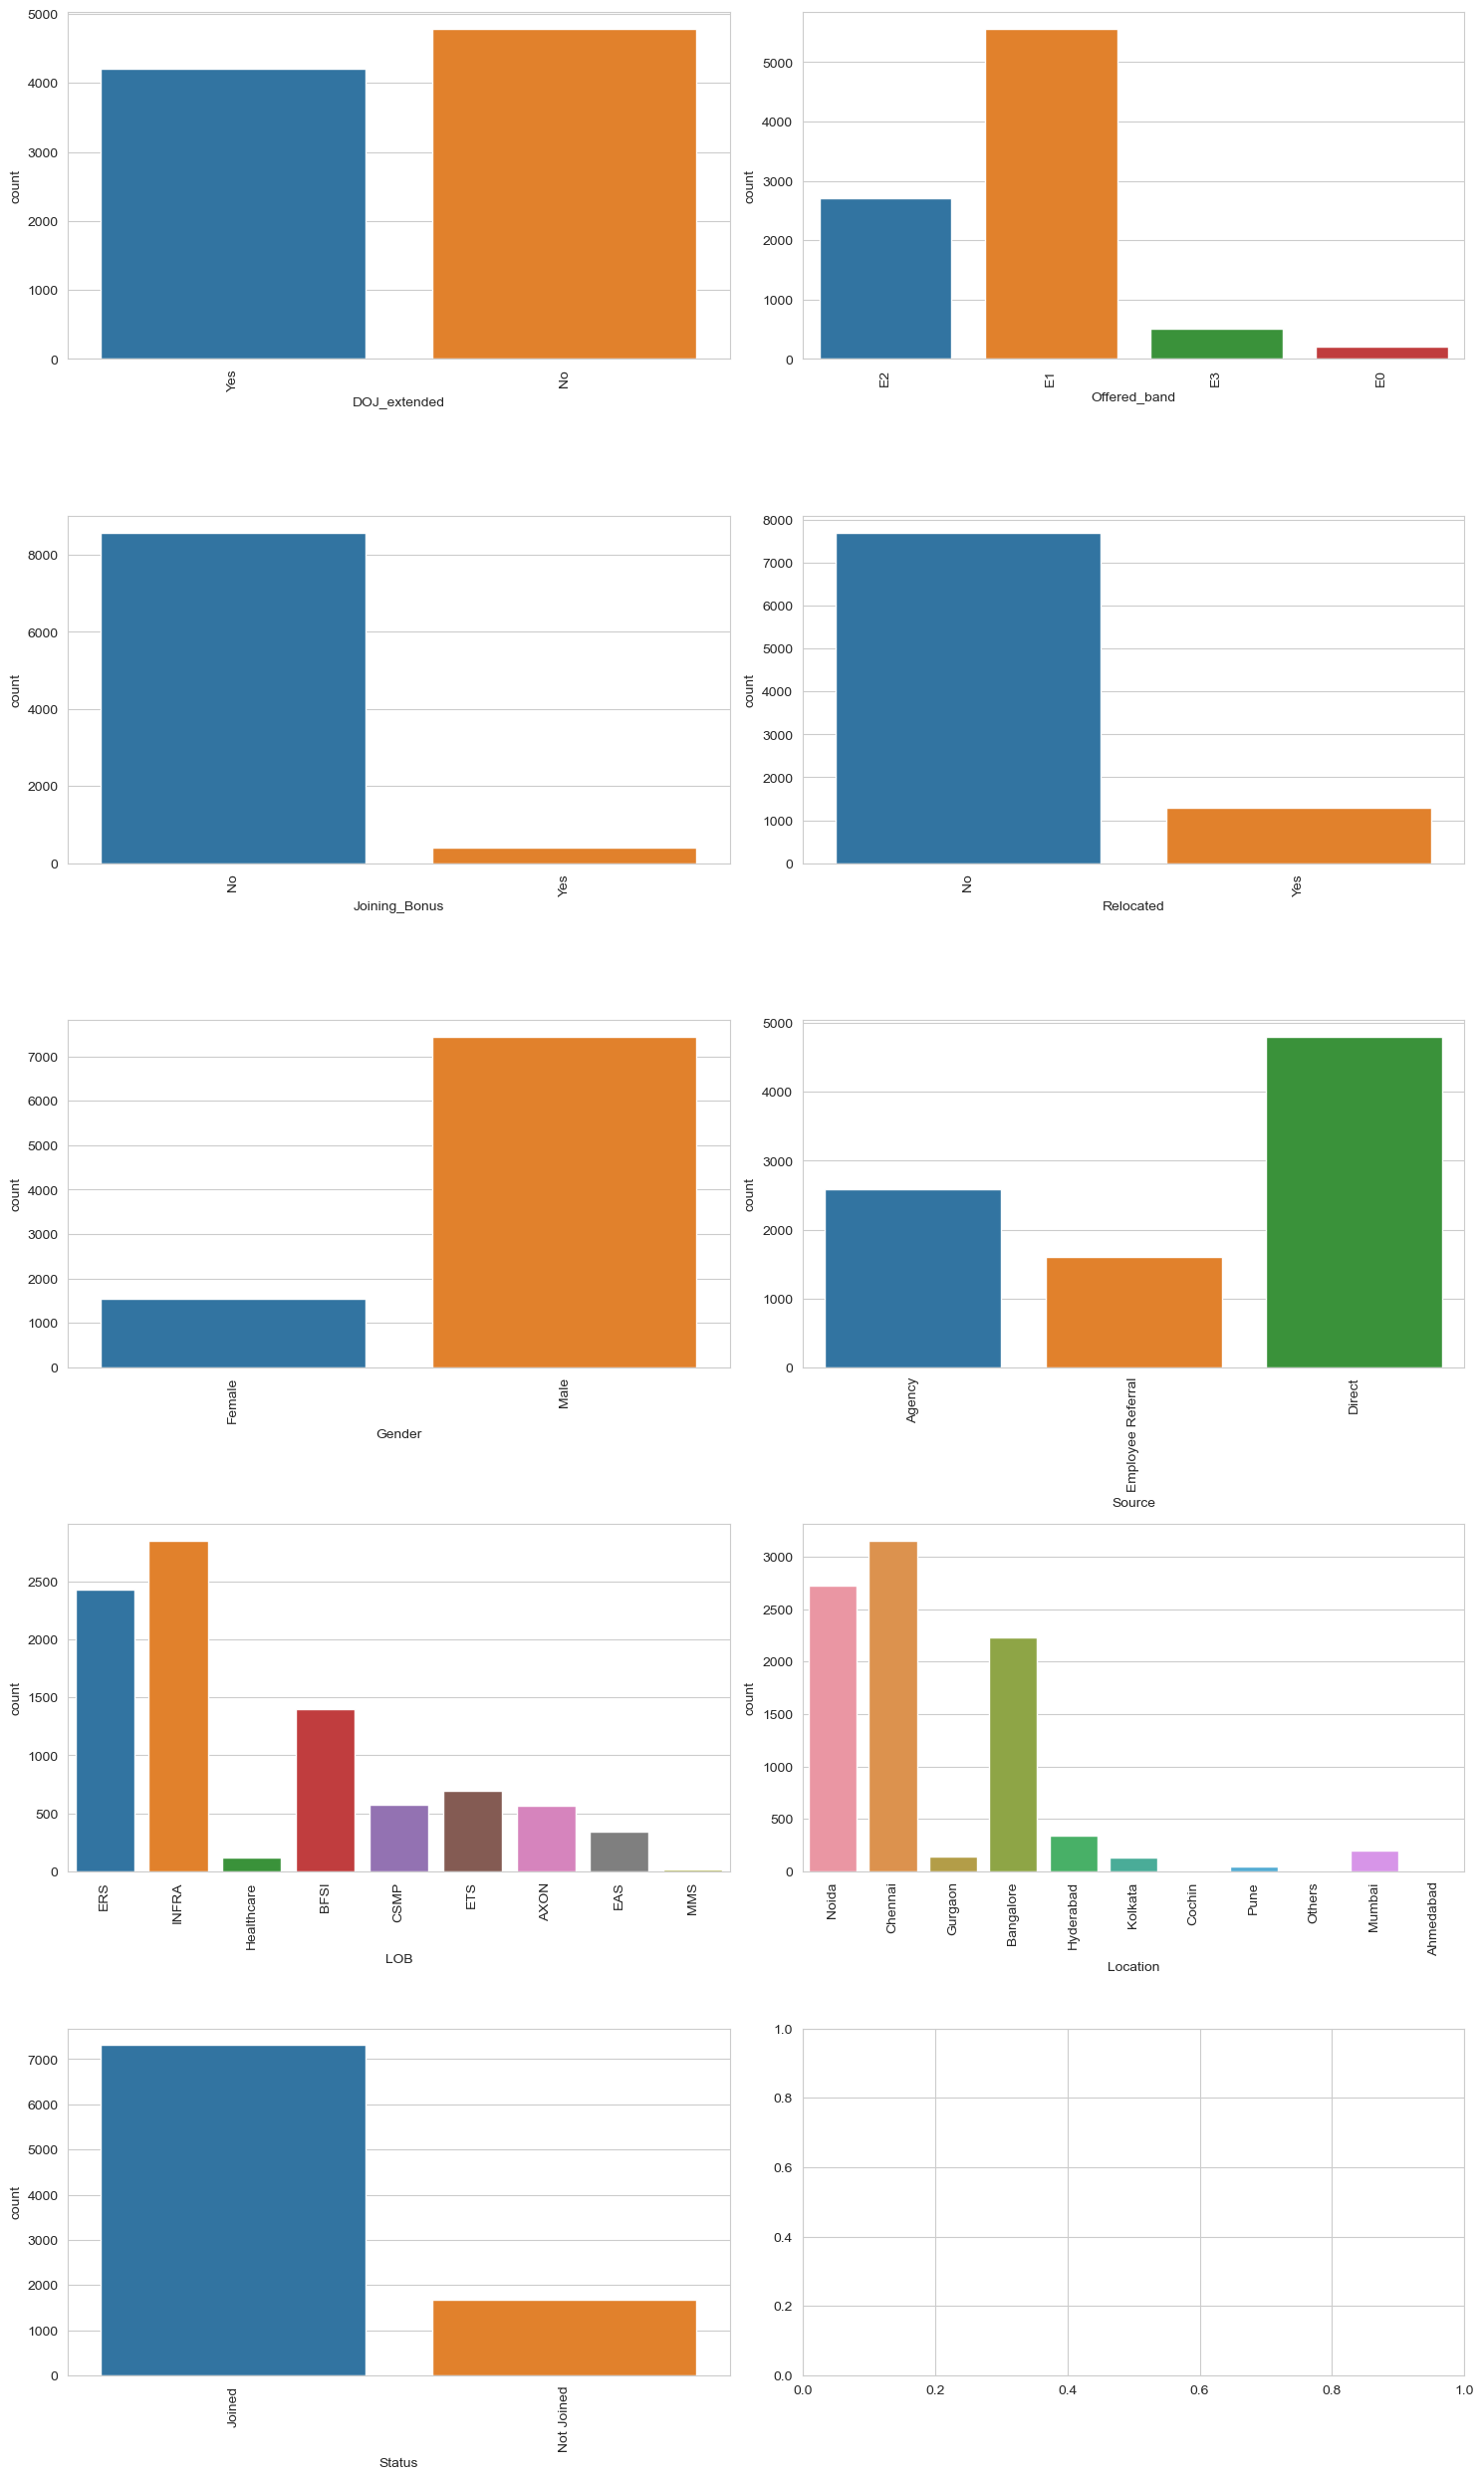

In [13]:
#count plot for catogorical data
length = len(categorical_variable)
fig, axes = plt.subplots(nrows=np.ceil(length/2).astype(int), ncols=2, figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)
for i, ax in zip(categorical_variable, axes.flatten()):
    sns.countplot(x=i, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [14]:
numerical_variable=[x for x in df.columns if x not in categorical_variable]
print('There are {} numerical features'.format(len(numerical_variable)))
print(numerical_variable)

There are 8 numerical features
['Candidate_ref', 'Accept_duration', 'Notice_period', 'Pecent_hike_expected', 'Percent_hike_offered', 'Percent_difference', 'Rex', 'Age']


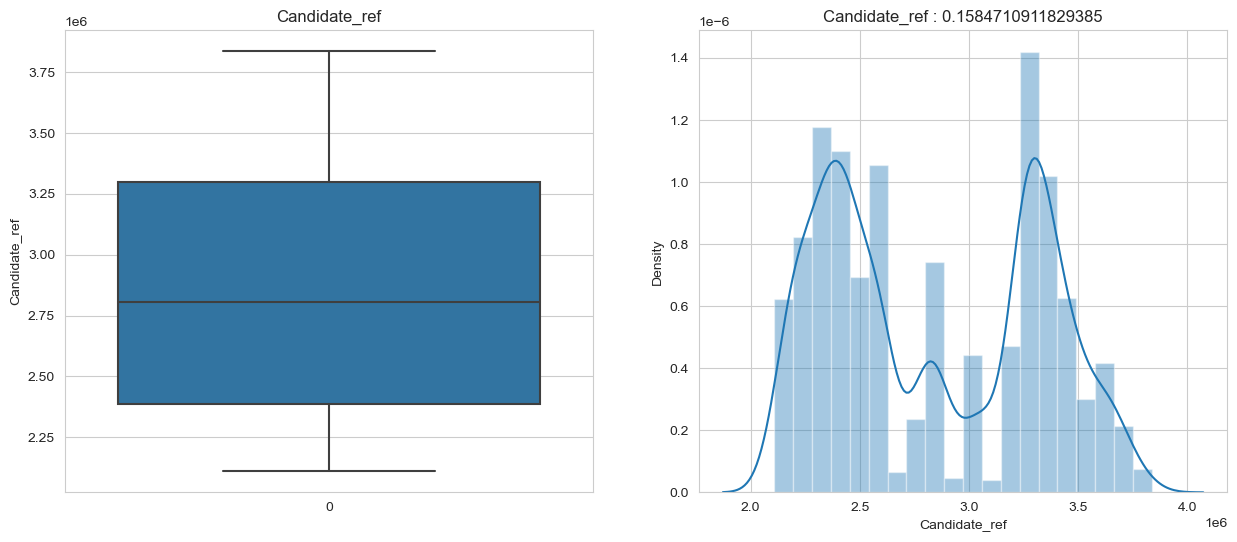

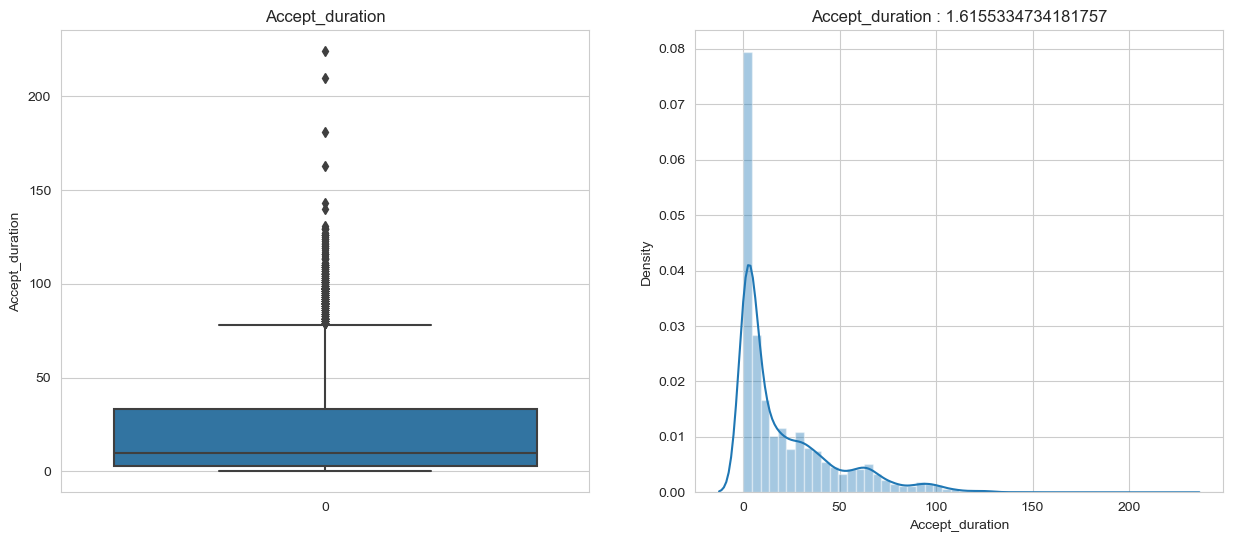

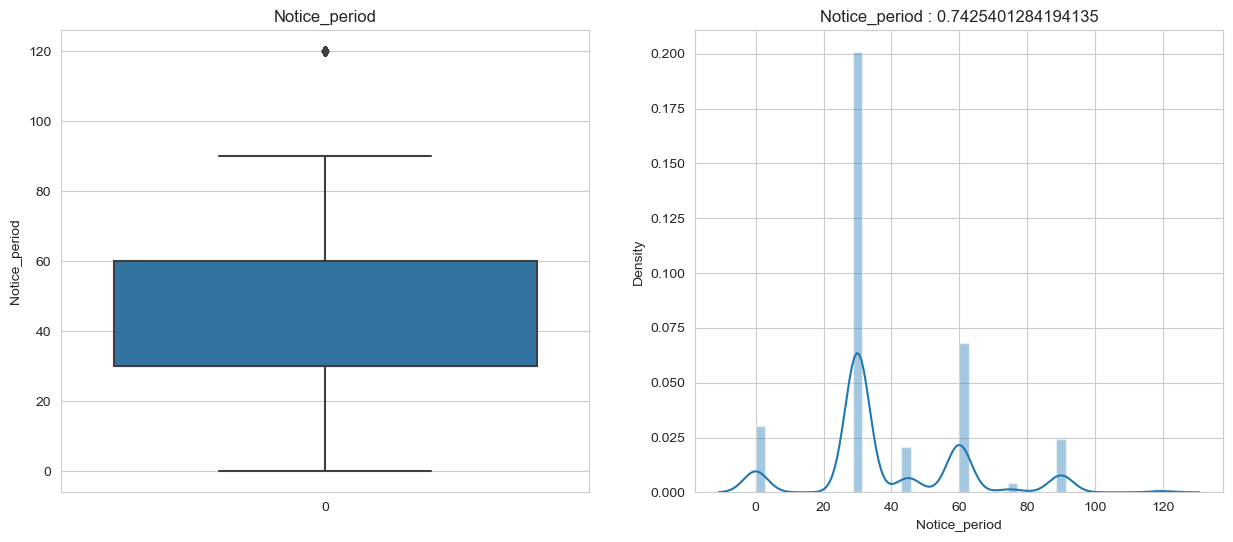

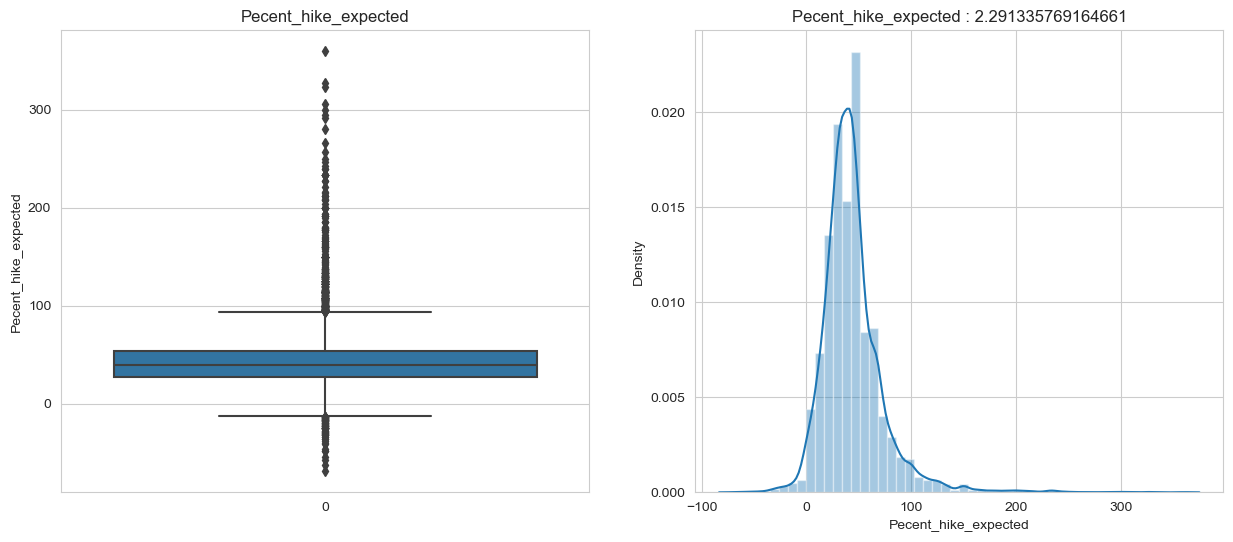

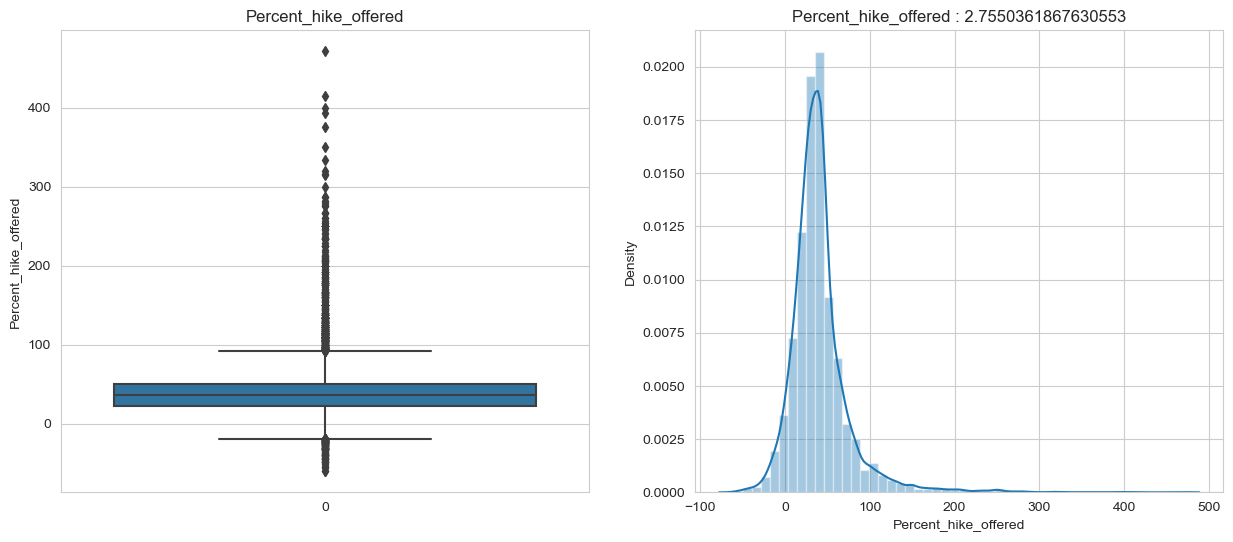

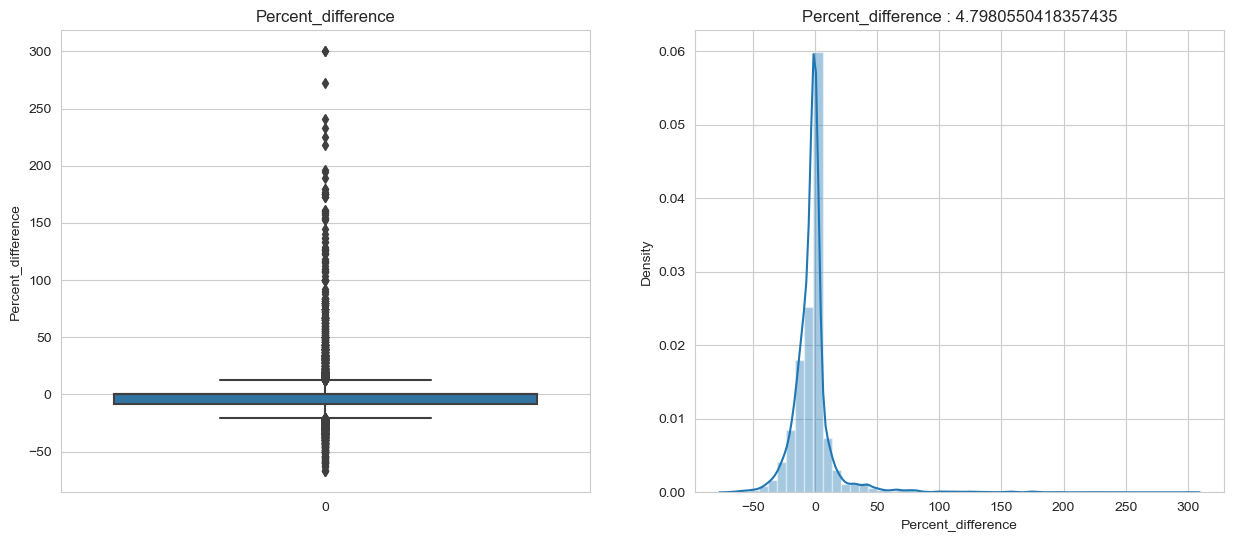

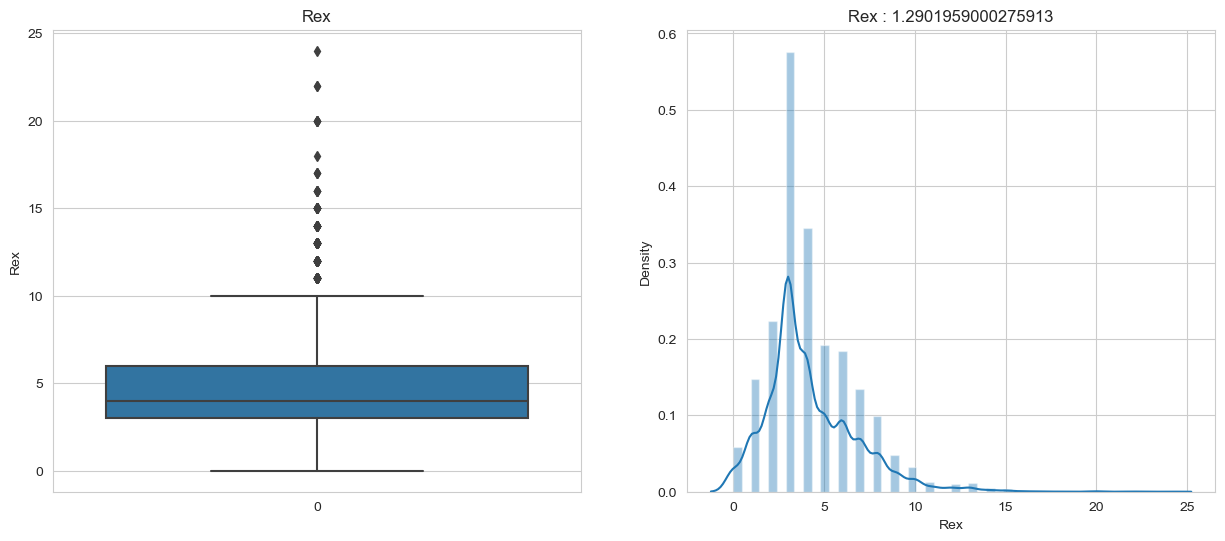

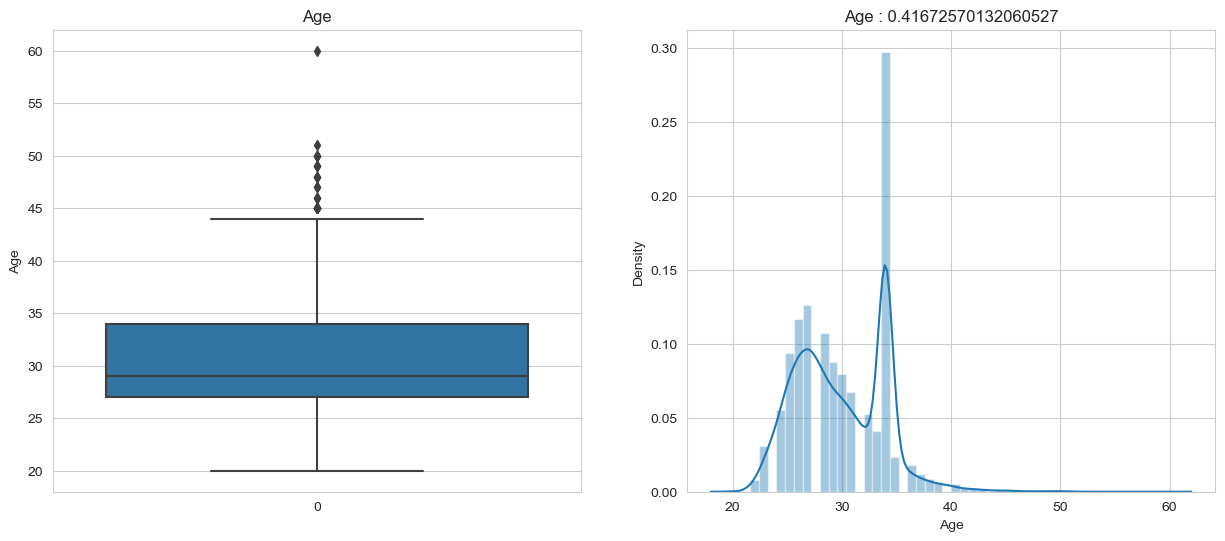

In [15]:
#boxplot for numerical data
for var in numerical_variable:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var])
    ax.set_title(f'{var} : {df[var].skew()}')
    ax.set_xlabel(var)
    
    plt.show()

## Observation from the above plots
1. Most of the candidates **didn't asked** for date of joining extension (DOJ).
2. Band offered to the candidate based on experience, performance in the interview rounds which is **E1** in most in number.
3. Most of the candidates **has not received** any joining bonus.
4. Most of the candidates **has not relocated** to any new city.
5. Most of the candidates are **Males**.
6. Most of the resumes obtained are **direct** and followed by the **Agency**.
7. **Chennai** is the place where most of the candidates got placed later by **Noida & Bangalore**.
8. Most candidates did **Joined** the offered job.

In [16]:
#Getting status in numbers
df['Status'].value_counts()

Status
Joined        7313
Not Joined    1682
Name: count, dtype: int64

In [17]:
#Dropping the "Candidate_ref" because it is just a unique id given to candidate like random genrated index ID
df.drop('Candidate_ref',axis=1,inplace=True)

In [18]:
df.head()

,DOJ_extended,Accept_duration,Notice_period,Offered_band,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [19]:
#Extracting catgorical varibales to list comp
listt_comprehension = ['DOJ_extended','Offered_band', 'Joining_Bonus', 'Relocated', 
       'Gender','Source', 'LOB', 'Location']

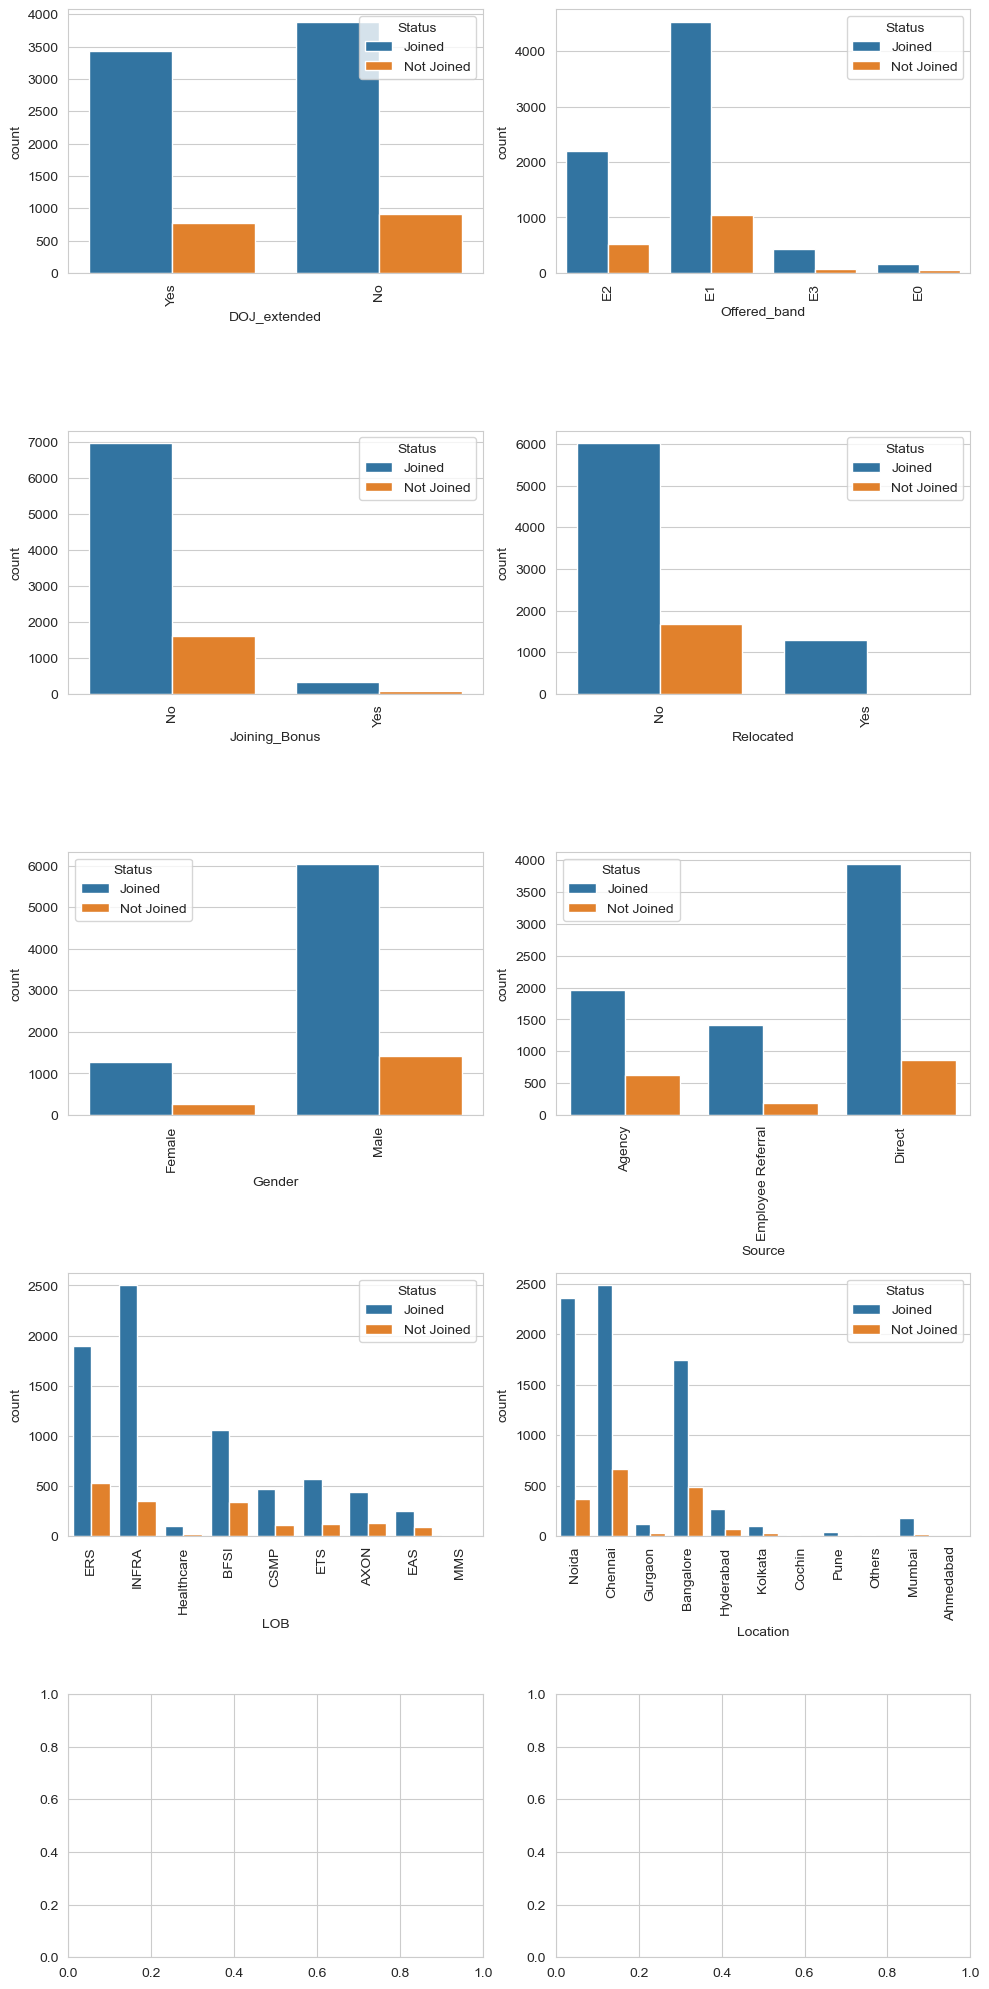

In [20]:
fig, axes = plt.subplots(nrows=np.ceil(length/2).astype(int), ncols=2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)
for i, j in zip(listt_comprehension, range(length)):
    plt.subplot(np.ceil(length/2), 2, j+1)
    sns.countplot(x=i, data=df, hue='Status')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


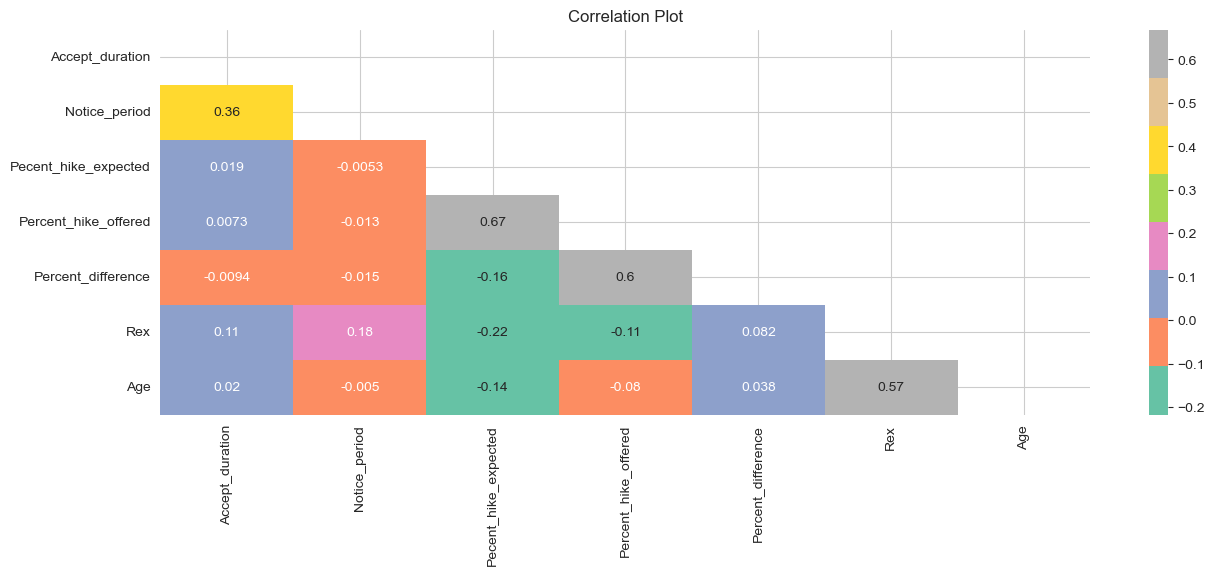

In [21]:
#cant use string in correlation so changing into int
numeric_df = df.select_dtypes(include=['number'])
#correlation plot
fig, ax = plt.subplots(figsize=(15, 5))
mask = np.zeros_like(numeric_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(numeric_df.corr(), cmap='Set2', annot=True, mask=mask, ax=ax)
plt.title('Correlation Plot')
plt.show()


We can see some relationship between the 
> **Percent_hike_offered & Percent_hike_excpected**

> **Percent_difference & Percent_hike_offered** 

> **Age & Rex*

In [22]:
#Independented Varibales
x = df.iloc[:,:-1]
x.head()

,DOJ_extended,Accept_duration,Notice_period,Offered_band,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Joining_Bonus,Relocated,Gender,Source,Rex,LOB,Location,Age
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34


In [23]:
#Dependented Varibales
y = df.iloc[:,-1]
y.head()

0    Joined
1    Joined
2    Joined
3    Joined
4    Joined
Name: Status, dtype: object

In [24]:
#Check unique attributes
df['Status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

In [25]:
#replace joined and not joined to 1 and 0 
y.replace(['Joined','Not Joined'],[1,0],inplace=True)
y

0       1
1       1
2       1
3       1
4       1
       ..
8990    1
8991    1
8992    1
8993    1
8994    1
Name: Status, Length: 8995, dtype: int64

In [26]:
counts = df['Status'].value_counts()
counts

Status
1    7313
0    1682
Name: count, dtype: int64

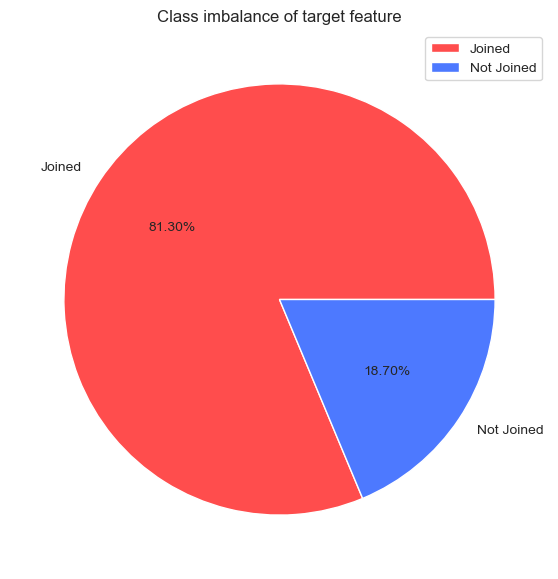

In [27]:
labels = ['Joined', 'Not Joined'] 
size = df['Status'].value_counts() 
colors = ['#ff4d4d', '#4d79ff']  
plt.figure(figsize=(7,7)) 
plt.pie(size, colors=colors, labels=labels,autopct='%.2f%%')
plt.axis('off') 
plt.title("Class imbalance of target feature") 
plt.legend()
plt.show()

# LABEL ENCODING

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
for i in categorical_variable:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DOJ_extended          8995 non-null   int64  
 1   Accept_duration       8995 non-null   int64  
 2   Notice_period         8995 non-null   int64  
 3   Offered_band          8995 non-null   int64  
 4   Pecent_hike_expected  8995 non-null   float64
 5   Percent_hike_offered  8995 non-null   float64
 6   Percent_difference    8995 non-null   float64
 7   Joining_Bonus         8995 non-null   int64  
 8   Relocated             8995 non-null   int64  
 9   Gender                8995 non-null   int64  
 10  Source                8995 non-null   int64  
 11  Rex                   8995 non-null   int64  
 12  LOB                   8995 non-null   int64  
 13  Location              8995 non-null   int64  
 14  Age                   8995 non-null   int64  
 15  Status               

### From all above observation we can observe the target variable which is "Status" is inbalance in nature which is we can observe from above plot number of candidates joined are more in number than the Not Joined once. Even though the model accuracy is good enough but the predications made are wrong we knew it. So inorder the make dataset balance in nature we shall use the Synthetic Minority Oversample TechniquE ( SMOTE ) for it to make it balance.

# Handling unbalanced data using SMOTE

In [31]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 

In [32]:
x = x.select_dtypes(include=['number'])

In [33]:
x_resampled, y_resampled = sm.fit_resample(x,y)

In [34]:
print("Before resampling:\n", y.value_counts())
print("\nAfter resampling:\n", pd.Series(y_resampled).value_counts())

Before resampling:
 Status
1    7313
0    1682
Name: count, dtype: int64

After resampling:
 Status
1    7313
0    7313
Name: count, dtype: int64


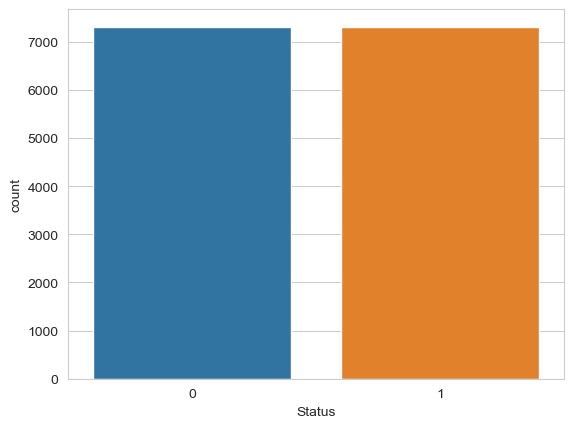

In [35]:
sns.countplot(x=pd.Series(y_resampled))
plt.show()

#From above observation we can see the target variable which is 'y' (Status) got balance

Standardize the data using the anyone of the scalers provided by sklearn


# STANDARD SCALING

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
x_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14626 entries, 0 to 14625
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Accept_duration       14626 non-null  int64  
 1   Notice_period         14626 non-null  int64  
 2   Pecent_hike_expected  14626 non-null  float64
 3   Percent_hike_offered  14626 non-null  float64
 4   Percent_difference    14626 non-null  float64
 5   Rex                   14626 non-null  int64  
 6   Age                   14626 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 800.0 KB


In [38]:
y_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14626 entries, 0 to 14625
Series name: Status
Non-Null Count  Dtype
--------------  -----
14626 non-null  int64
dtypes: int64(1)
memory usage: 114.4 KB


In [39]:
numerical_cols = x_resampled.select_dtypes(include=['int64', 'float64']).columns

In [40]:
numerical_data = x_resampled[numerical_cols]

In [41]:
sc = StandardScaler()
scaled_data = sc.fit_transform(numerical_data)

In [42]:
scaled_data

array([[-0.3065999 , -0.5506035 , -2.30651342, ...,  2.38167999,
         1.20828739,  1.14890917],
       [-0.16054717, -0.5506035 ,  0.22532888, ...,  9.65477946,
         1.63437504,  1.14890917],
       [-0.70824493,  0.10610841, -0.03075236, ...,  0.10863752,
        -0.06997556, -0.66717264],
       ...,
       [-0.67173175, -0.5506035 ,  0.03455247, ...,  0.42559944,
        -0.92215086,  1.14890917],
       [-0.37962627,  2.07624414, -0.63271299, ...,  0.10979   ,
        -0.49606321, -0.40773238],
       [ 1.2999802 , -0.5506035 , -0.97537554, ...,  0.14730366,
         2.0604627 ,  0.3705884 ]])

In [43]:
scaled_df = pd.DataFrame(scaled_data,columns=numerical_cols)

In [44]:
scaled_df.head()

,Accept_duration,Notice_period,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age
0,-0.306600,-0.550604,-2.306513,-0.784742,2.381680,1.208287,1.148909
1,-0.160547,-0.550604,0.225329,8.228214,9.654779,1.634375,1.148909
2,-0.708245,0.106108,-0.030752,0.087062,0.108638,-0.069976,-0.667173
3,0.131558,-0.550604,-0.030752,0.087062,0.108638,-0.069976,1.148909
4,-0.781271,3.389668,-0.039694,0.079719,0.108638,0.782200,1.148909


# MODEL BUILDING

In [45]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=46)

In [46]:
#Checking shape of train,test
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (10238, 7)
Shape of x_test : (4388, 7)
Shape of y_train : (10238,)
Shape of y_test : (4388,)


In [47]:
x_train.head()

,Accept_duration,Notice_period,Pecent_hike_expected,Percent_hike_offered,Percent_difference,Rex,Age
5092,0,60,33.33,33.33,0.00,5,29
8966,7,0,80.00,80.00,0.00,1,34
2603,2,30,33.33,33.33,0.00,2,27
13071,5,30,56.25,43.23,-8.33,2,24
7381,16,30,78.57,53.57,-14.00,3,34


In [48]:
y_train.head()

5092     1
8966     1
2603     1
13071    0
7381     1
Name: Status, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DOJ_extended          8995 non-null   int64  
 1   Accept_duration       8995 non-null   int64  
 2   Notice_period         8995 non-null   int64  
 3   Offered_band          8995 non-null   int64  
 4   Pecent_hike_expected  8995 non-null   float64
 5   Percent_hike_offered  8995 non-null   float64
 6   Percent_difference    8995 non-null   float64
 7   Joining_Bonus         8995 non-null   int64  
 8   Relocated             8995 non-null   int64  
 9   Gender                8995 non-null   int64  
 10  Source                8995 non-null   int64  
 11  Rex                   8995 non-null   int64  
 12  LOB                   8995 non-null   int64  
 13  Location              8995 non-null   int64  
 14  Age                   8995 non-null   int64  
 15  Status               

In [50]:
x_train_num = x_train[numerical_cols]
x_test_num = x_test[numerical_cols]

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_num)
x_test_scaled = scaler.transform(x_test_num)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [53]:
def result_summarizer_for_train(y_train,y_train_pred):
    
    print('Training set evaluation result :\n')
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    
    print("Accuracy: ", accuracy_train*100)
    print("Precision: ", precision_train*100)
    print("Recall: ", recall_train*100)
    print("F1 Score: ", f1_train*100)
    print("roc_auc_score: ", roc_auc_score_train*100)

In [54]:
def result_summarizer_for_test(y_test,y_test_pred):
    
    print('Test set evaluation result :\n')
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    
    print("Accuracy: ", accuracy_test*100)
    print("Precision: ", precision_test*100)
    print("Recall: ", recall_test*100)
    print("F1 Score: ", f1_test*100)
    print("roc_auc_score: ", roc_auc_score_test*100)

In [55]:
def visualize(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, y_train_pred)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0], fmt='d', cmap='Blues')
    ax1.set_title('Confusion Matrix for Training Set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_test_pred)
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[1], fmt='d', cmap='Blues')
    ax2.set_title('Confusion Matrix for Test Set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')

    plt.show()

In [56]:
def plot_roc_curve(y_test, y_pred,y_pred_prob):
    
    y_test = y_test.ravel()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the Area Under the Curve (AUC)
    auc = roc_auc_score(y_test, y_pred_prob)
    # Plotting the ROC curve 
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

# 1. LOGISTICS REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train_scaled, y_train)
print(model_lr)

y_train_pred_lr = model_lr.predict(x_train_scaled)
y_test_pred_lr = model_lr.predict(x_test_scaled)
y_pred_prob_lr = model_lr.predict_proba(x_test_scaled)

y_pred_prob_lr = y_pred_prob_lr[:, 1]


LogisticRegression()


In [58]:
result_summarizer_for_train(y_train,y_train_pred_lr)

Training set evaluation result :

Accuracy:  59.562414534088695
Precision:  58.36273817925194
Recall:  65.01572327044025
F1 Score:  61.509854964670886
roc_auc_score:  59.59524027599682


In [59]:
result_summarizer_for_test(y_test,y_test_pred_lr)

Test set evaluation result :

Accuracy:  59.77666362807658
Precision:  59.49628406275805
Recall:  64.76404494382022
F1 Score:  62.01850656337421
roc_auc_score:  59.705184746528694


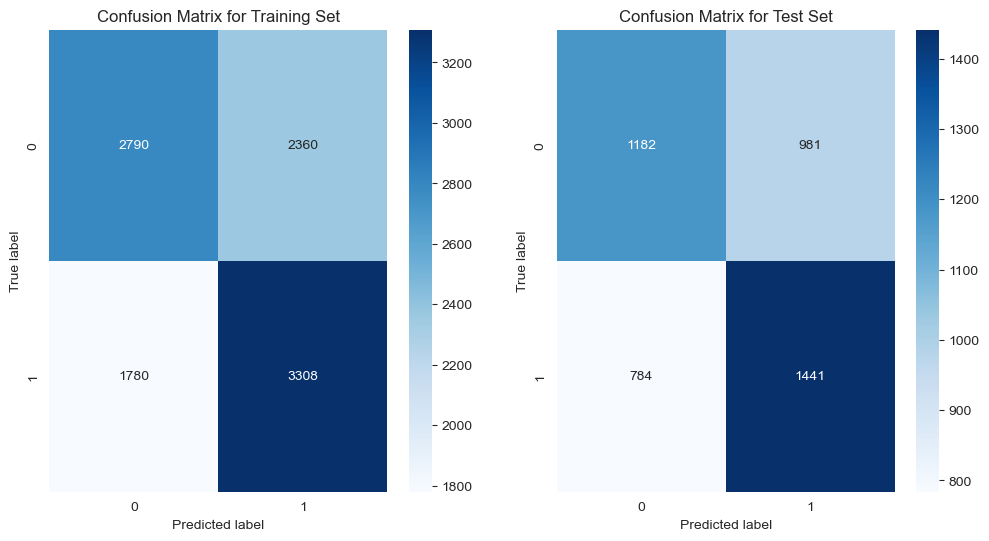

In [60]:
visualize(y_train, y_train_pred_lr, y_test, y_test_pred_lr)

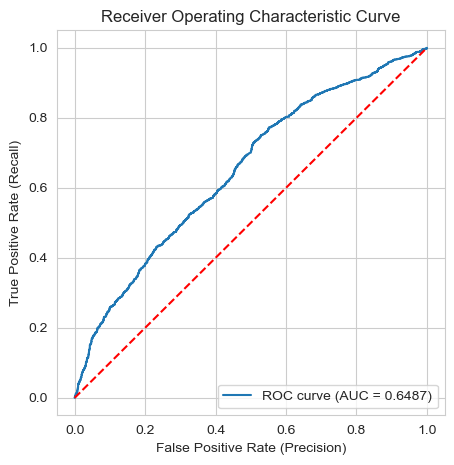

In [61]:
plot_roc_curve(y_test, y_test_pred_lr,y_pred_prob_lr)

# 2. Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_pred)
nb_confusion = confusion_matrix(y_test, y_pred)
nb_precision = precision_score(y_test,y_pred)
nb_f1_score = f1_score(y_test,y_pred)
nb_recall = recall_score(y_test,y_pred)
print('Accuracy:', nb_accuracy)
print('Confusion matrix:\n', nb_confusion)
print('Precision:\n', nb_precision)
print('recall:\n', nb_recall)
print('f1 score:\n',nb_f1_score)

Accuracy: 0.6128076572470373
Confusion matrix:
 [[1399  764]
 [ 935 1290]]
Precision:
 0.6280428432327166
recall:
 0.5797752808988764
f1 score:
 0.6029446132273896


In [63]:
from sklearn.naive_bayes import GaussianNB  

model_nb = GaussianNB()  
model_nb.fit(x_train_scaled, y_train)
print(model_nb)

y_train_pred_nb = model_nb.predict(x_train_scaled)
y_test_pred_nb = model_nb.predict(x_test_scaled)
y_pred_prob_nb = model_nb.predict_proba(x_test_scaled)

y_pred_prob_nb = y_pred_prob_nb[:, 1]

GaussianNB()


In [64]:
result_summarizer_for_train(y_train,y_train_pred_nb)

Training set evaluation result :

Accuracy:  60.646610666145726
Precision:  61.43875567077123
Recall:  55.89622641509434
F1 Score:  58.53658536585367
roc_auc_score:  60.61801612016854


In [65]:
result_summarizer_for_test(y_test,y_test_pred_nb)

Test set evaluation result :

Accuracy:  61.280765724703734
Precision:  62.804284323271666
Recall:  57.97752808988764
F1 Score:  60.294461322738954
roc_auc_score:  61.32810754933586


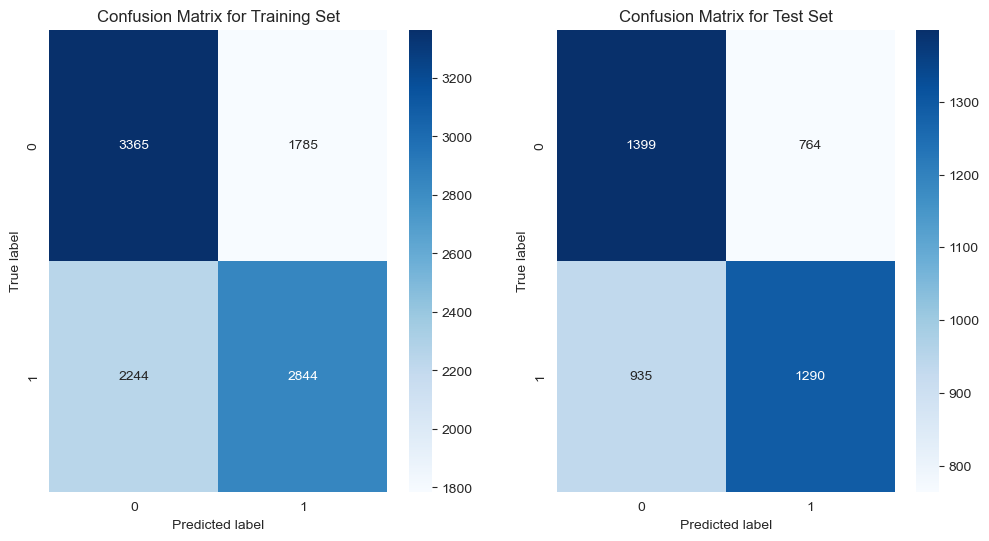

In [66]:
visualize(y_train, y_train_pred_nb, y_test, y_test_pred_nb)

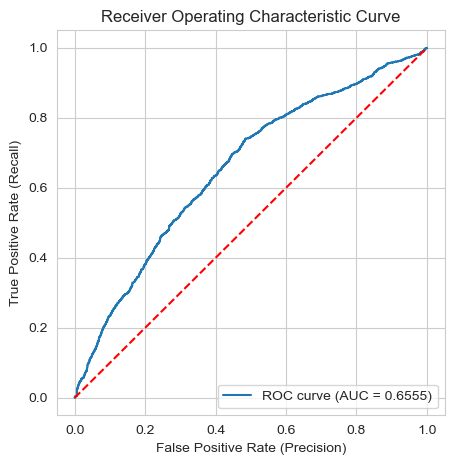

In [67]:
plot_roc_curve(y_test, y_test_pred_nb,y_pred_prob_nb)

# 3.DecisionTree

In [68]:
from sklearn.tree import DecisionTreeClassifier  

# Checking Max Depth
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model_dt = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)

In [69]:
results

[0.6292160437556974,
 0.6554238833181404,
 0.6727438468550593,
 0.6773017319963537,
 0.7108021877848678,
 0.7176390154968095,
 0.7203737465815861,
 0.7324521422060164,
 0.7374658158614403,
 0.7481768459434822]

In [70]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=12, random_state=101, max_features = trees)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)

In [71]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=12, random_state=101, max_features = None, min_samples_leaf = trees)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)


In [72]:
model_dt= DecisionTreeClassifier(max_depth=12, random_state=101, max_features = None, min_samples_leaf = 15,criterion='entropy')   
model_dt.fit(x_train, y_train)
print(model_dt)

y_train_pred_dt = model_dt.predict(x_train)
y_test_pred_dt = model_dt.predict(x_test)
y_pred_prob_dt = model_dt.predict_proba(x_test)

y_pred_prob_dt = y_pred_prob_dt[:, 1]

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=15,
                       random_state=101)


In [73]:
result_summarizer_for_train(y_train,y_train_pred_dt)

Training set evaluation result :

Accuracy:  75.77651885133815
Precision:  76.68849774866968
Recall:  73.64386792452831
F1 Score:  75.13535191497894
roc_auc_score:  75.76368153507968


In [74]:
result_summarizer_for_test(y_test,y_test_pred_dt)

Test set evaluation result :

Accuracy:  70.53327256153145
Precision:  72.36084452975048
Recall:  67.7752808988764
F1 Score:  69.99303782780227
roc_auc_score:  70.57279995013168


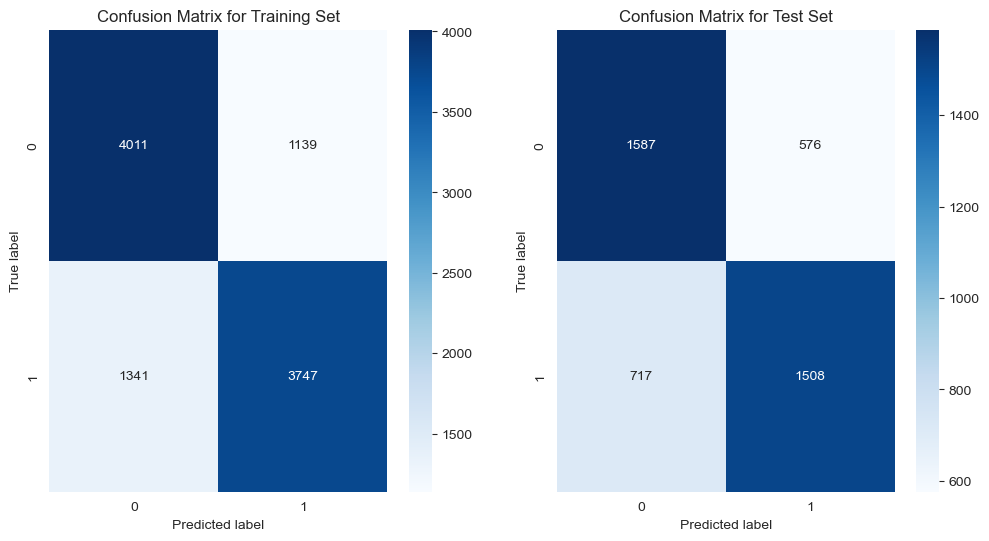

In [75]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_dt)

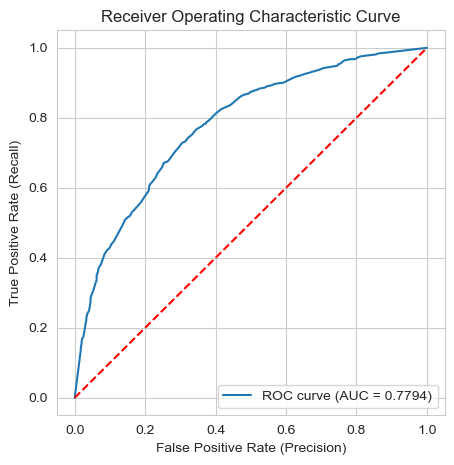

In [76]:
plot_roc_curve(y_test, y_test_pred_dt,y_pred_prob_dt)

# 4.RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimator_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimator_options:
    model_rf = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)

In [78]:
results

[0.7953509571558797,
 0.8101640838650866,
 0.8097082953509571,
 0.8144940747493163,
 0.8142661804922516,
 0.8197356426618049,
 0.8185961713764813,
 0.8211030082041932,
 0.8226982680036463,
 0.8222424794895169,
 0.8224703737465816,
 0.8252051048313582,
 0.8249772105742935,
 0.8261166818596172,
 0.8254329990884229,
 0.8265724703737466,
 0.8265724703737466]

In [79]:
results = []
max_features_options = [None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model_rf = RandomForestClassifier(n_estimators=90, oob_score=True, n_jobs=-1, random_state=101, max_features = trees)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)

In [80]:
results

[0.8119872379216043,
 0.8254329990884229,
 0.8165451230628988,
 0.8211030082041932,
 0.8240656335460347,
 0.827028258887876,
 0.827028258887876]

In [81]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model_rf = RandomForestClassifier(n_estimators=90, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)


In [82]:
model_rf= RandomForestClassifier(n_estimators=95, oob_score=True, n_jobs=-1, random_state=101, max_features = 'sqrt', min_samples_leaf = 1)
model_rf.fit(x_train, y_train)
print(model_rf)

y_train_pred_rf = model_rf.predict(x_train)
y_test_pred_rf = model_rf.predict(x_test)
y_pred_prob_rf = model_rf.predict_proba(x_test)

y_pred_prob_rf = y_pred_prob_rf[:, 1]

RandomForestClassifier(n_estimators=95, n_jobs=-1, oob_score=True,
                       random_state=101)


In [83]:
result_summarizer_for_train(y_train,y_train_pred_rf)

Training set evaluation result :

Accuracy:  99.45301816761086
Precision:  99.82178217821782
Recall:  99.07625786163521
F1 Score:  99.44762280528703
roc_auc_score:  99.45075029004093


In [84]:
result_summarizer_for_test(y_test,y_test_pred_rf)

Test set evaluation result :

Accuracy:  82.65724703737466
Precision:  85.84720861900098
Recall:  78.78651685393258
F1 Score:  82.16545582376376
roc_auc_score:  82.71272213477951


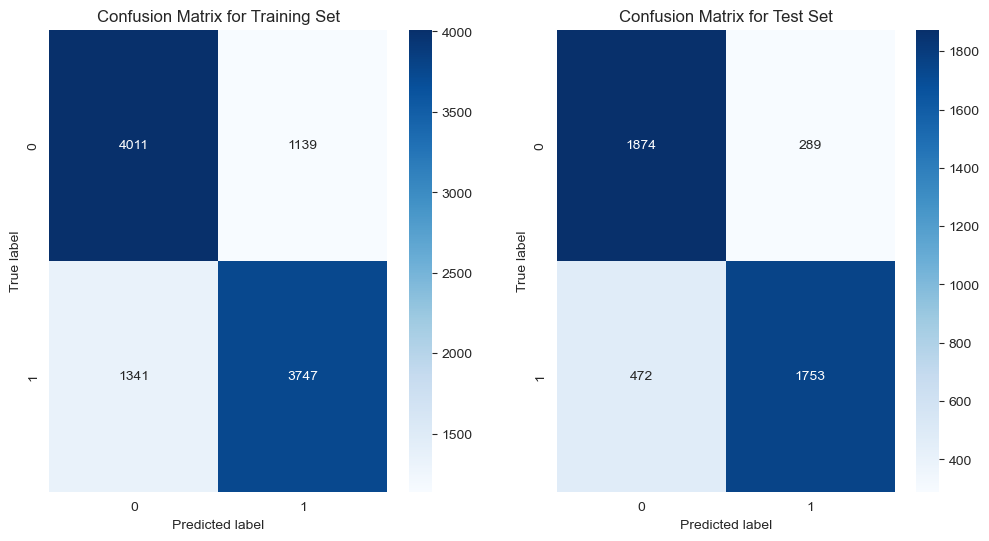

In [85]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_rf)

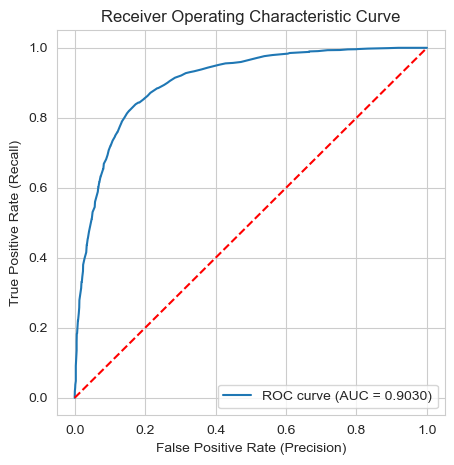

In [86]:
plot_roc_curve(y_test, y_test_pred_rf,y_pred_prob_rf)

# 5.KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_scaled,y_train)
print(model_knn)

y_train_pred_knn= model_knn.predict(x_train_scaled)
y_test_pred_knn= model_knn.predict(x_test_scaled)
y_pred_prob_knn= model_knn.predict_proba(x_test_scaled)

y_pred_prob_knn = y_pred_prob_knn[:, 1]

KNeighborsClassifier(n_neighbors=3)


In [88]:
result_summarizer_for_train(y_train,y_train_pred_knn)

Training set evaluation result :

Accuracy:  86.94080875170933
Precision:  92.9471032745592
Recall:  79.77594339622641
F1 Score:  85.85933368588049
roc_auc_score:  86.89768043597728


In [89]:
result_summarizer_for_test(y_test,y_test_pred_knn)

Test set evaluation result :

Accuracy:  74.13400182315407
Precision:  81.46651270207852
Recall:  63.41573033707865
F1 Score:  71.31665403083144
roc_auc_score:  74.28761551527997


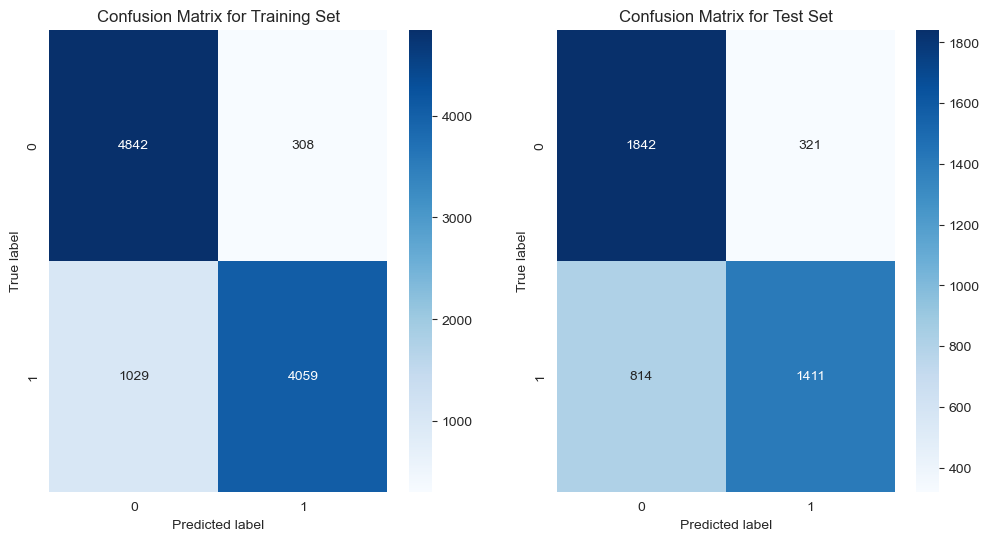

In [90]:
visualize(y_train, y_train_pred_knn, y_test, y_test_pred_knn)

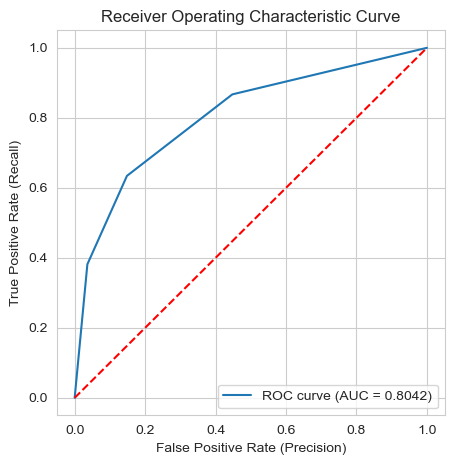

In [91]:
plot_roc_curve(y_test, y_test_pred_knn,y_pred_prob_knn)

# 6.SVC

In [92]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

svc_accuracy = accuracy_score(y_test, y_pred)
svc_confusion = confusion_matrix(y_test, y_pred)
svc_precision = precision_score(y_test,y_pred)
svc_f1_score = f1_score(y_test,y_pred)
svc_recall = recall_score(y_test,y_pred)
print('Accuracy:', svc_accuracy)
print('Confusion matrix:\n', svc_confusion)
print('Precision:\n', svc_precision)
print('recall:\n', svc_recall)
print('f1 score:\n',svc_f1_score)

Accuracy: 0.6355970829535096
Confusion matrix:
 [[1126 1037]
 [ 562 1663]]
Precision:
 0.6159259259259259
recall:
 0.7474157303370786
f1 score:
 0.6753299492385786


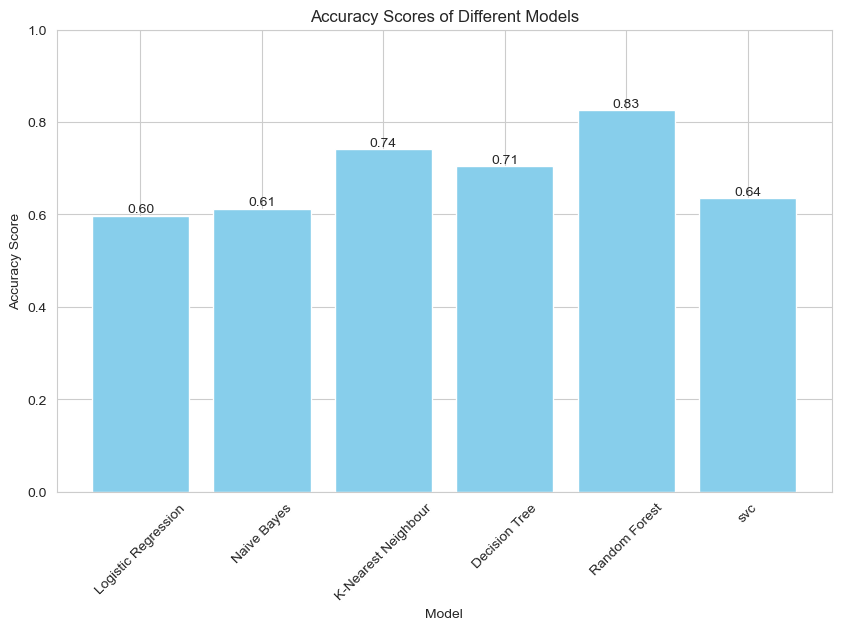

In [94]:
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
svc_accuracy = accuracy_score(y_test, y_pred)

model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour','Decision Tree','Random Forest','svc']
accuracy_scores = [accuracy_lr,accuracy_nb,accuracy_knn,accuracy_dt,accuracy_rf,svc_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy scores)

# Display the accuracy scores on top of the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

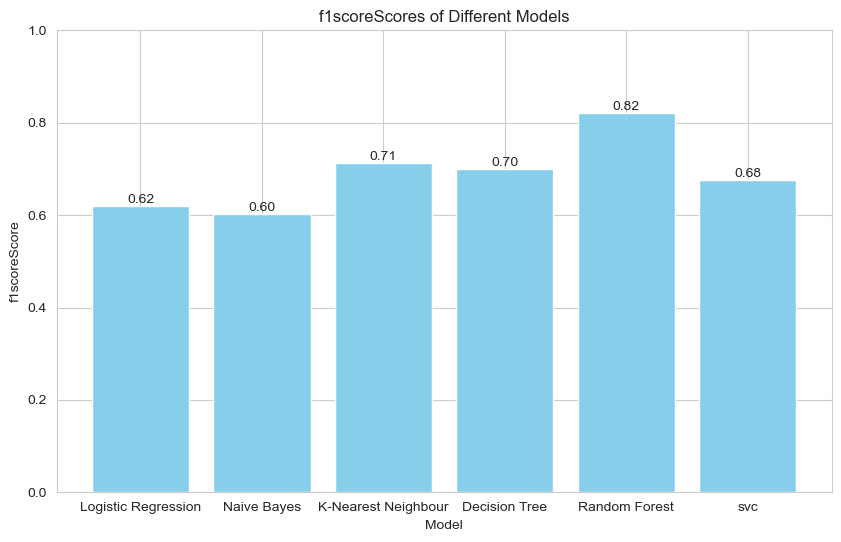

In [96]:
f1score_lr = f1_score(y_test, y_test_pred_lr)
f1score_nb = f1_score(y_test, y_test_pred_nb)
f1score_knn = f1_score(y_test, y_test_pred_knn)
f1score_dt = f1_score(y_test, y_test_pred_dt)
f1score_rf = f1_score(y_test, y_test_pred_rf)
f1score_svc = f1_score(y_test,y_pred)

model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour','Decision Tree','Random Forest','svc']
f1score_scores = [f1score_lr,f1score_nb,f1score_knn,f1score_dt,f1score_rf,f1score_svc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1score_scores, color='skyblue')
plt.title('f1scoreScores of Different Models')
plt.xlabel('Model')
plt.ylabel('f1scoreScore')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for f1scorescores)

# Display the f1scorescores on top of the bars
for i, f1score in enumerate(f1score_scores):
    plt.text(i, f1score, f'{f1score:.2f}', ha='center', va='bottom')

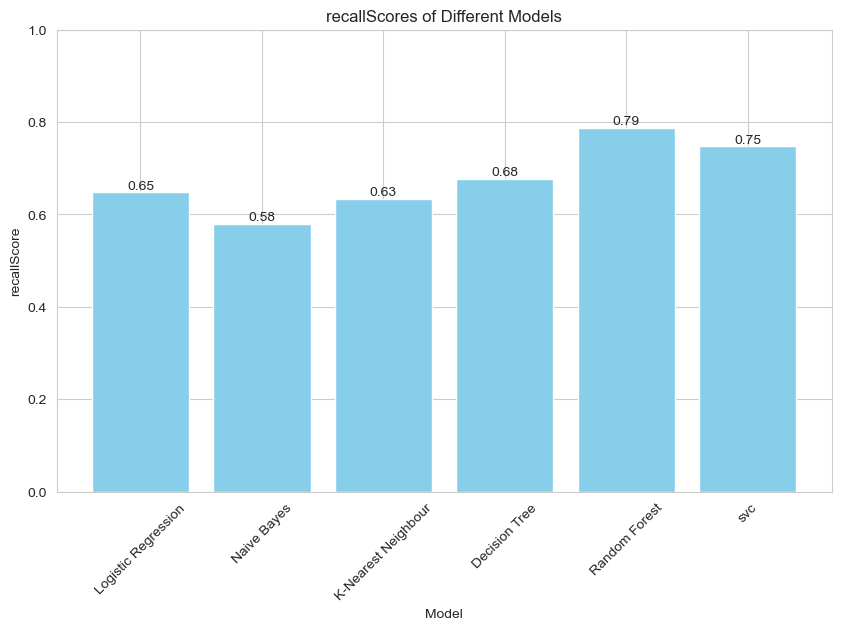

In [97]:
recall_lr = recall_score(y_test, y_test_pred_lr)
recall_nb = recall_score(y_test, y_test_pred_nb)
recall_knn = recall_score(y_test, y_test_pred_knn)
recall_dt = recall_score(y_test, y_test_pred_dt)
recall_rf = recall_score(y_test, y_test_pred_rf)
recall_svc = recall_score(y_test,y_pred)
model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour','Decision Tree','Random Forest','svc']
recall_scores = [recall_lr,recall_nb,recall_knn,recall_dt,recall_rf,recall_svc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, recall_scores, color='skyblue')
plt.title('recallScores of Different Models')
plt.xlabel('Model')
plt.ylabel('recallScore')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for recallscores)

# Display the recallscores on top of the bars
for i, recall in enumerate(recall_scores):
    plt.text(i, recall, f'{recall:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

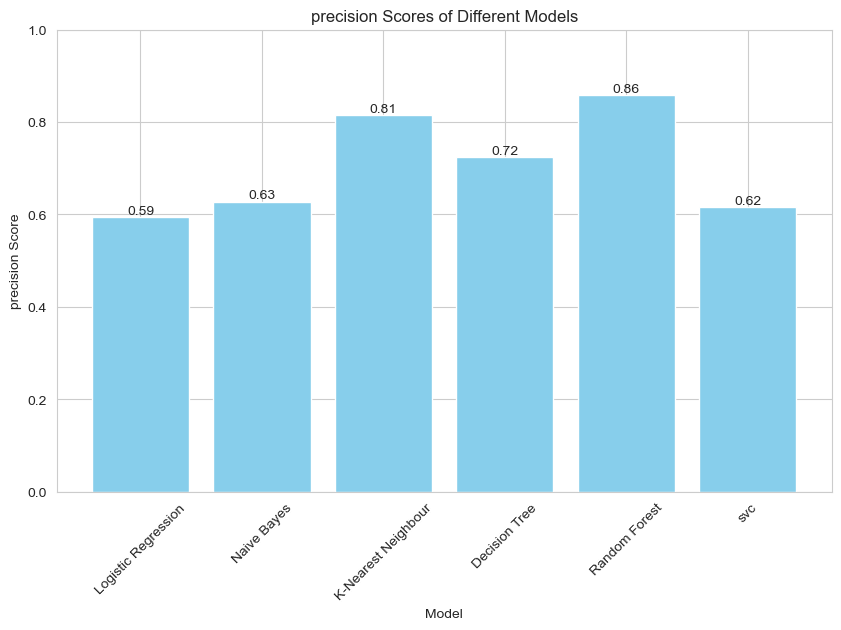

In [98]:
precision_lr = precision_score(y_test, y_test_pred_lr)
precision_nb = precision_score(y_test, y_test_pred_nb)
precision_knn = precision_score(y_test, y_test_pred_knn)
precision_dt = precision_score(y_test, y_test_pred_dt)
precision_rf = precision_score(y_test, y_test_pred_rf)
precision_svc = precision_score(y_test,y_pred)

model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour','Decision Tree','Random Forest','svc']
precision_scores = [precision_lr,precision_nb,precision_knn,precision_dt,precision_rf,precision_svc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, precision_scores, color='skyblue')
plt.title('precision Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('precision Score')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for precision scores)

# Display the precision scores on top of the bars
for i, precision in enumerate(precision_scores):
    plt.text(i, precision, f'{precision:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [109]:
print("The best model is RandomForest with an Presicion score of ",precision_rf)

The best model is RandomForest with an Presicion score of  0.8584720861900098


In [ ]:
# conclusion 

In [ ]:
# Notice period affects the most whether or not candidate will join the company.
# If offered hike is lower than expected than candidate is more likely to withdraw from the application
# LOB and joning bonus affect the likelihoog of the candidates. so keep this in mind.